In [1]:
import pathlib
import geopandas
import geopandas as gpd
import pandas
import numpy
import numpy as np
import pandas as pd

from scipy.stats import truncnorm
from scipy import stats
import seaborn as sns

import random

import matplotlib.pyplot as plt

from matplotlib.patches import Polygon
import seaborn as sns 

In [2]:
def polygon(axes, x1, y1, x2, y2, c):
    """
    @Definition:
                A function to create polygon
    @Arguments:
                axes (matplotlib axis):
                            Axis of matplotlib subplot
                x1, y1, x2, y2 (float):
                            Coordinates of head (x1, y1) and tail (x2, y2) in matplotlib plot
                c (each color in cmap):
                            Each color in cmap
    @Returns:
                None
    """
    # Make the PDF become a colorbar
    y1=y2=0.03
    
    # Create polygon
    polygon = Polygon(
        [(x1, y1), (x2, y2), (x2, 0), (x1, 0)], color=c
    )

    # Add polygon into patch
    axes.add_patch(polygon)
    
def rainbow_fill_sns(axes, bin_data, X, Y, ylimit, cmap):
    """
    @Definition:
                A function to create polygon
    @Arguments:
                axes (matplotlib axis):
                            Axis of matplotlib subplot
                bin_data (array):
                            An array of quantiles
                ylimit (float):
                            Value represents the limit of y axis
                X, Y (float):
                            Two list of x and y labels of density plot
                cmap (each color in cmap):
                            Cmap color
    @Returns:
                None
    """
    # Get the size of the data (how many values)
    N = Y.size

    # Create sub-color from main color
    kde_df = pd.DataFrame(data={'kde':X}) # Create dataframe for labels of x axis
    kde_df['color'] = pd.cut(
        kde_df['kde'], bin_data,
        labels=[cmap(x/(bin_data.size-2)) for x in range(bin_data.size-1)],
        ordered=False
    ) # Create groups following range of values from bin_data and label it with sub-color
    kde_df['color'][0] = kde_df['color'][1] # Color the first group otherwise it would be Nan

    # Make the bottom x axis start at 0 of y axis
    axes.set_ylim(top=ylimit, bottom=0)

    # Plot each vertical color
    for n, (x, y) in enumerate(zip(X, Y)):
        # Use polygon
        if n+1 == N: continue
        polygon(axes, x, y, X[n+1], Y[n+1], kde_df['color'][n])

### Rupp

In [3]:
rupp_coords = pd.read_csv(fr"S:\Bathymetry\version012\rupp_combination_001\1_bathy\bathy_analyses\coord_combination_rupp.csv")
rupp_depth_simulations = pd.read_csv(fr"S:\Bathymetry\versions010\rupp_combination_001\1_bathy\bathy_analyses\depth_combination_rupp.csv")
rupp_ori_depth_bed_wse = pd.read_csv(fr"S:\Bathymetry\versions010\rupp_combination_001\1_bathy\bathy_analyses\ori_depth_bed_wse.csv")

In [4]:
rupp_coords_filter = rupp_coords[:675].copy(deep=True)
rupp_depth_simulations_filter = rupp_depth_simulations[:675].copy(deep=True)
rupp_ori_depth_bed_wse_filter = rupp_ori_depth_bed_wse[:675].copy(deep=True)

In [5]:
rupp_depth_simulations_filter_copy = rupp_depth_simulations_filter.copy(deep=True)
rupp_ori_depth_bed_wse_filter_copy = rupp_ori_depth_bed_wse_filter.copy(deep=True)

In [6]:
rupp_depth_simulations_filter_copy['mean'] = rupp_depth_simulations_filter.mean(axis=1)
rupp_depth_simulations_filter_copy['sd'] = rupp_depth_simulations_filter.std(axis=1)
rupp_depth_simulations_filter_copy['cv'] = rupp_depth_simulations_filter.std(axis=1) / rupp_depth_simulations_filter.mean(axis=1) * 100

### Neal

In [7]:
neal_coords = pd.read_csv(fr"S:\Bathymetry\version012\neal_combination_001\1_bathy\bathy_analyses\coord_combination_neal.csv")
neal_depth_simulations = pd.read_csv(fr"S:\Bathymetry\versions010\neal_combination_001\1_bathy\bathy_analyses\depth_combination_neal.csv")
neal_ori_depth_bed_wse = pd.read_csv(fr"S:\Bathymetry\versions010\neal_combination_001\1_bathy\bathy_analyses\ori_depth_bed_wse.csv")

In [8]:
neal_coords_filter = neal_coords[:675].copy(deep=True)
neal_depth_simulations_filter = neal_depth_simulations[:675].copy(deep=True)
neal_ori_depth_bed_wse_filter = neal_ori_depth_bed_wse[:675].copy(deep=True)

In [9]:
neal_depth_simulations_filter_copy = neal_depth_simulations_filter.copy(deep=True)
neal_ori_depth_bed_wse_filter_copy = neal_ori_depth_bed_wse_filter.copy(deep=True)

In [10]:
neal_depth_simulations_filter_copy['mean'] = neal_depth_simulations_filter.mean(axis=1)
neal_depth_simulations_filter_copy['sd'] = neal_depth_simulations_filter.std(axis=1)
neal_depth_simulations_filter_copy['cv'] = neal_depth_simulations_filter.std(axis=1) / neal_depth_simulations_filter.mean(axis=1) * 100

--------------------------------------------------------------

In [11]:
data_color = np.append(
    rupp_depth_simulations_filter_copy['cv'].to_numpy(),
    neal_depth_simulations_filter_copy['cv'].to_numpy()
) 

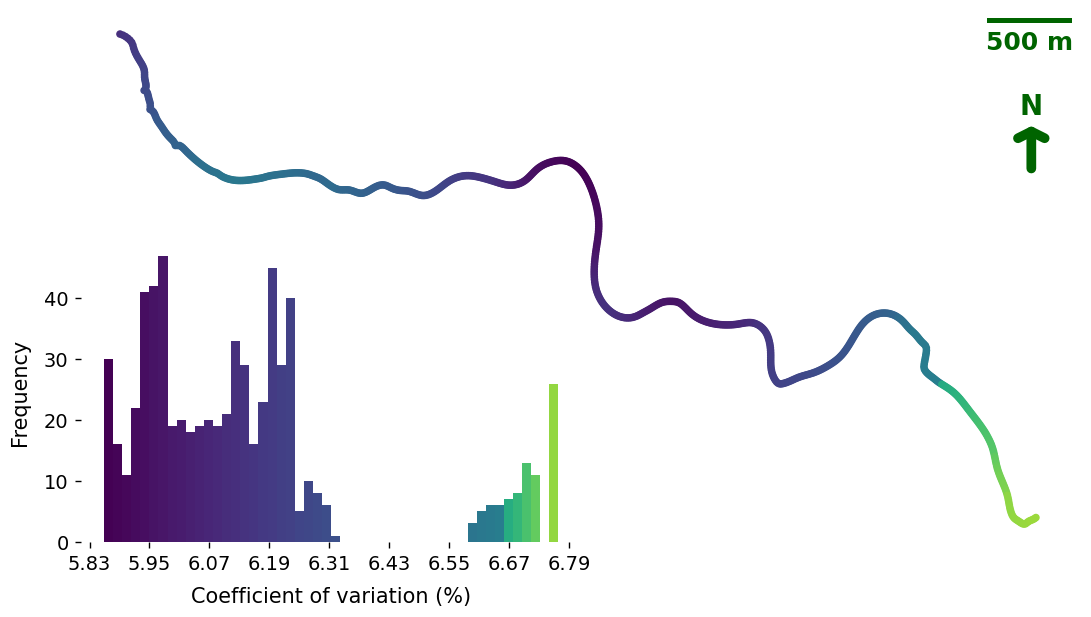

In [21]:
# Ref: https://stackoverflow.com/questions/67165115/is-there-a-levels-equivalent-argument-for-matplotlib-scatter-plot

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar 
from matplotlib.colors import BoundaryNorm, ListedColormap


data = rupp_depth_simulations_filter_copy['cv'].to_numpy()

map_range = np.linspace(0, 1, 250)
map_range_quantile = np.quantile(data_color, map_range)
map_level = map_range_quantile

norm = BoundaryNorm(map_level, len(map_level) - 1)

x_tick_range_pdf = [5.83, 6.791, 0.12]


fig, ax = plt.subplots(figsize=(13, 7))

sc=ax.scatter(
    rupp_coords_filter.x,
    rupp_coords_filter.y,
    c=data,
    cmap='viridis',
    norm=norm,
    s=20
)

# Remove grid background lines (including x, y lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove all labels and ticks of zoom axis
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('');

# Inset
axins = inset_axes(ax, width=5, height=3, loc=3)

# Histogram
cm = ListedColormap(sc.get_cmap()(sc.norm(np.sort(data_color[:675]))))
edges, _, patches = axins.hist(data, bins=50)
for j, p in enumerate(patches):
    p.set_facecolor(cm(j / len(patches)))

axins.set_ylabel('Frequency', fontsize=12, labelpad=10)
axins.set_xlabel('Coefficient of variation (%)', fontsize=12, labelpad=10)

# Set tick positions first
x_range = np.arange(x_tick_range_pdf[0], x_tick_range_pdf[1], x_tick_range_pdf[2])
xlabel_arr = x_range
axins.set_xticks(xlabel_arr)

# Design size and style for ticks and labels
for item in (axins.get_xticklabels() + axins.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(14)
axins.tick_params(direction='out', length=4, pad=5, colors='black', width=1)

axins.set_ylabel('Frequency', fontsize=15, labelpad=10)
axins.set_xlabel('Coefficient of variation (%)', fontsize=15, labelpad=10)

# Remove grid background lines (including x, y lines)
axins.spines['top'].set_visible(False)
axins.spines['right'].set_visible(False)
axins.spines['bottom'].set_visible(False)
axins.spines['left'].set_visible(False)


# Add scale bar
ax.add_artist(ScaleBar(
    1,
    font_properties={'weight': 'bold', 'size': 18},
    pad=0.5,
    length_fraction=0.1,
    box_color=None,
    box_alpha=0,
    color='darkgreen',
    scale_formatter=lambda value, unit: f'{value} {unit}',
    location=1
))


# Arrow
x_arrow, y_arrow, arrow_length = 0.95, 0.7, 0.12
ax.annotate(
    'N', fontweight='bold', color='darkgreen',
    xy=(x_arrow, y_arrow),
    xytext=(x_arrow, y_arrow+arrow_length),
    arrowprops=dict(arrowstyle='<-, head_width=0.8', facecolor='darkgreen', edgecolor='darkgreen', linewidth=7,
                    mutation_scale=12),
    ha='center', va='center', fontsize=20,
    xycoords=ax.transAxes, zorder=5
)

# Save fig
name = 'S3_rupp_depth_combination_histogram_CoV'
fig.savefig(
    fr"P:\\Martin_publication\\Bathymetry\\All_results\\selection_cmap_007\\{name}.jpg",
    bbox_inches='tight', dpi=600
)

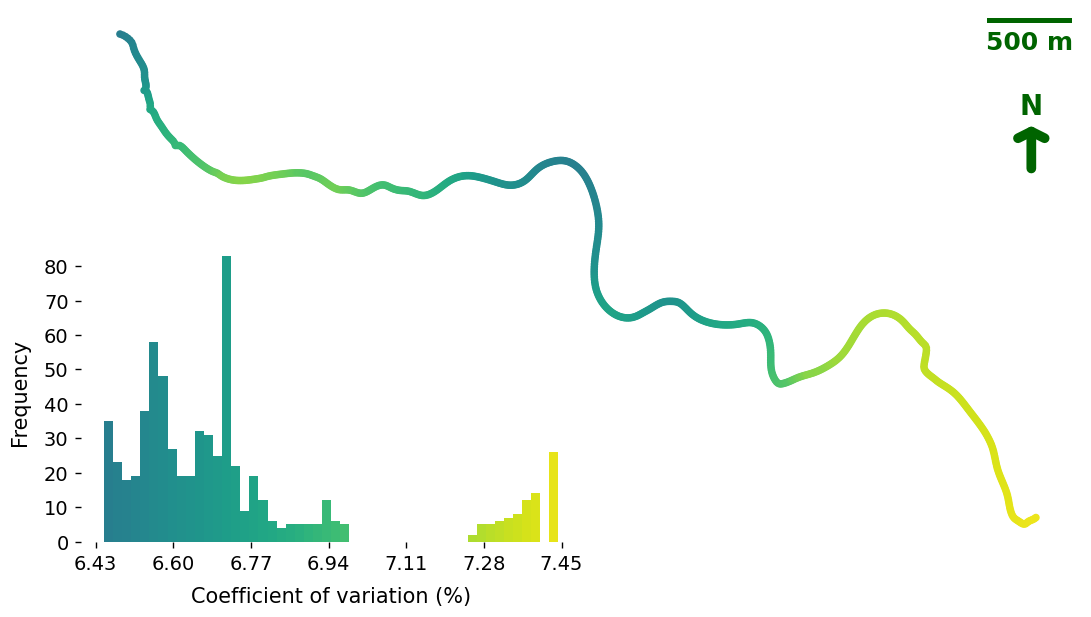

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar 
from matplotlib.colors import BoundaryNorm, ListedColormap

data = neal_depth_simulations_filter_copy['cv'].to_numpy()

map_range = np.linspace(0, 1, 250)
map_range_quantile = np.quantile(data_color, map_range)
map_level = map_range_quantile
norm = BoundaryNorm(map_level, len(map_level) - 1)


x_tick_range_pdf = [6.43, 7.45, 0.17]



fig, ax = plt.subplots(figsize=(13, 7))

sc = ax.scatter(
    neal_coords_filter.x,
    neal_coords_filter.y,
    c=data,
    cmap='viridis',
    norm=norm,
    s=20
)

# Remove grid background lines (including x, y lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove all labels and ticks of zoom axis
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('');

# Inset
axins = inset_axes(ax, width=5, height=3, loc=3)

# Histogram
cm = ListedColormap(sc.get_cmap()(sc.norm(np.sort(data_color[675:]))))
edges, _, patches = axins.hist(data, bins=50)
for j, p in enumerate(patches):
    p.set_facecolor(cm(j / len(patches)))
    
# Set tick positions first
x_range = np.arange(x_tick_range_pdf[0], x_tick_range_pdf[1], x_tick_range_pdf[2])
xlabel_arr = x_range
axins.set_xticks(xlabel_arr)

# Design size and style for ticks and labels
for item in (axins.get_xticklabels() + axins.get_yticklabels()):  # For x, y ticks' labels
    item.set_fontsize(14)
axins.tick_params(direction='out', length=4, pad=5, colors='black', width=1)

axins.set_ylabel('Frequency', fontsize=15, labelpad=10)
axins.set_xlabel('Coefficient of variation (%)', fontsize=15, labelpad=10)

# Remove grid background lines (including x, y lines)
axins.spines['top'].set_visible(False)
axins.spines['right'].set_visible(False)
axins.spines['bottom'].set_visible(False)
axins.spines['left'].set_visible(False)


# Add scale bar
ax.add_artist(ScaleBar(
    1,
    font_properties={'weight': 'bold', 'size': 18},
    pad=0.5,
    length_fraction=0.1,
    box_color=None,
    box_alpha=0,
    color='darkgreen',
    scale_formatter=lambda value, unit: f'{value} {unit}',
    location=1
))


# Arrow
x_arrow, y_arrow, arrow_length = 0.95, 0.7, 0.12
ax.annotate(
    'N', fontweight='bold', color='darkgreen',
    xy=(x_arrow, y_arrow),
    xytext=(x_arrow, y_arrow+arrow_length),
    arrowprops=dict(arrowstyle='<-, head_width=0.8', facecolor='darkgreen', edgecolor='darkgreen', linewidth=7,
                    mutation_scale=12),
    ha='center', va='center', fontsize=20,
    xycoords=ax.transAxes, zorder=5
)

# Save fig
name = 'S3_neal_depth_combination_histogram_CoV'
fig.savefig(
    fr"P:\\Martin_publication\\Bathymetry\\All_results\\selection_cmap_007\\{name}.jpg",
    bbox_inches='tight', dpi=600
)